# Домашнее задание №12

## Задание 1

Подготовить тестовое изображение в градациях серого, содержащее один объект.

In [1]:
import cv2
import numpy as np
import skimage
import skimage.io
from matplotlib import pyplot as plt

src_image_url = 'https://drive.google.com/u/0/uc?id=1Ts34Ll6X9OE-EFdjSjOptUzltfrMSMf9&export=download'
src_image = skimage.io.imread(src_image_url)
gray_image = cv2.cvtColor(src_image, cv2.COLOR_RGB2GRAY)

## Задание 2

Построить для него дескриптор HOG.

In [2]:
win_size = gray_image.shape
cell_size = (8, 8)
num_bins = 9
block_size = (16, 16)
block_stride = (8, 8)

cells_in_block = int(block_size[0] / cell_size[0] * block_size[1] / cell_size[1])
len_of_block_vec = cells_in_block * num_bins
num_of_blocks_x = 1 + int((gray_image.shape[0] - block_size[0]) / block_stride[0])
num_of_blocks_y = 1 + int((gray_image.shape[1] - block_size[1]) / block_stride[1])
num_of_blocks = num_of_blocks_x * num_of_blocks_y
print(f"Descriptor must have {len_of_block_vec * num_of_blocks} elements")

hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, num_bins)
hog_descriptor = hog.compute(gray_image)

print (f"HOG descriptor: {hog_descriptor}")
print (f"HOG descriptor has {hog_descriptor.shape[0]} elements")

Descriptor must have 34596 elements
HOG descriptor: [0.21129575 0.21749413 0.13980894 ... 0.16295981 0.11499307 0.07291135]
HOG descriptor has 34596 elements


## Задание 3

Найти и отобразить особые точки SIFT (cv.SIFT).

In [3]:
sift = cv2.SIFT_create()
kp = sift.detect(gray_image, None)
sift_image = cv2.drawKeypoints(gray_image, kp, None, color=(255, 0, 0))

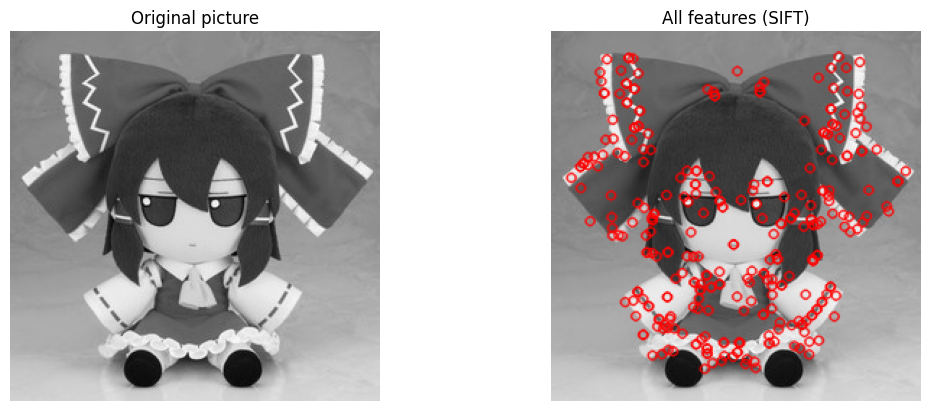

In [4]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.title("Original picture")

plt.subplot(1, 2, 2)
plt.imshow(sift_image, cmap='gray')
plt.axis("off")
plt.title("All features (SIFT)");

### Выполнил: Лежнин Максим Витальевич